In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mplim
from PIL import Image
import os

In [19]:
plt.rcParams['figure.figsize'] = (10.0, 12.0)

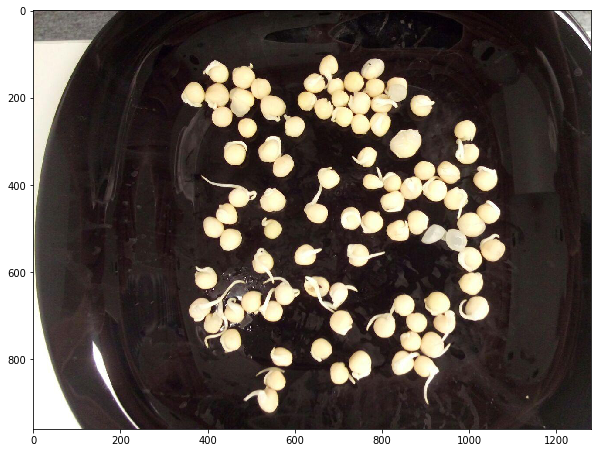

In [39]:
im = cv2.imread('C:/Users/mi/pease/001.jpg')

plt.imshow(im[:,:,::-1])
plt.show()

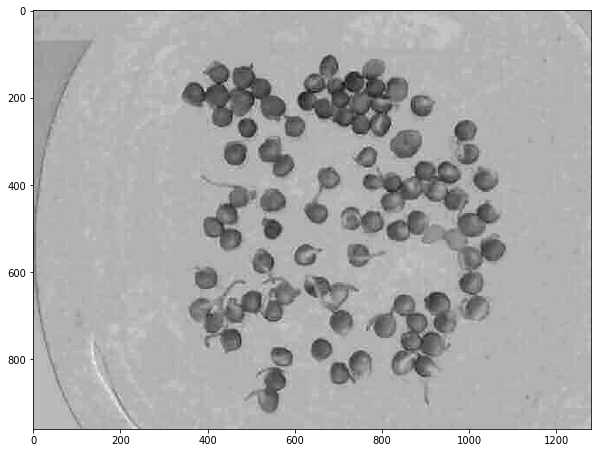

In [40]:
yuv = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)
# yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

plt.imshow(yuv[:,:,1], cmap='gray')
plt.show()

125


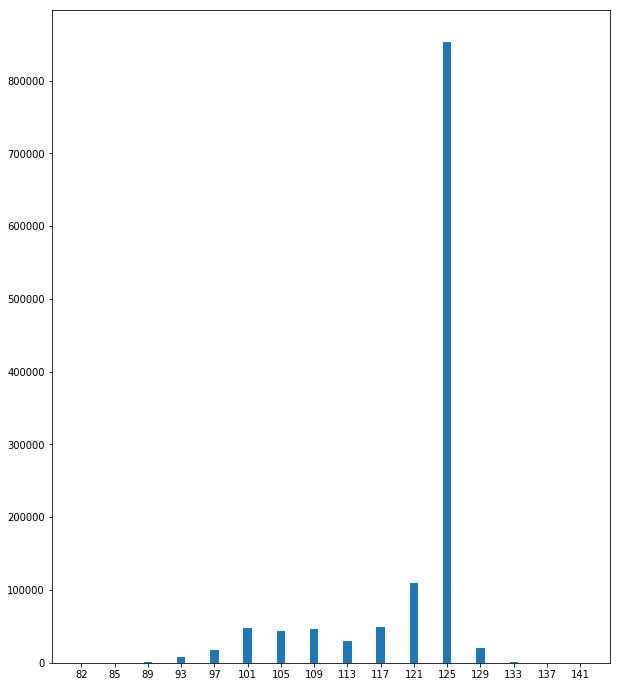

In [41]:
h, b = np.histogram(yuv[:,:,1], bins=16)
print(int(b[h.argmax()]))

plt.bar(b[:-1], h, width=1, tick_label=b[:-1].astype(int))
plt.show()

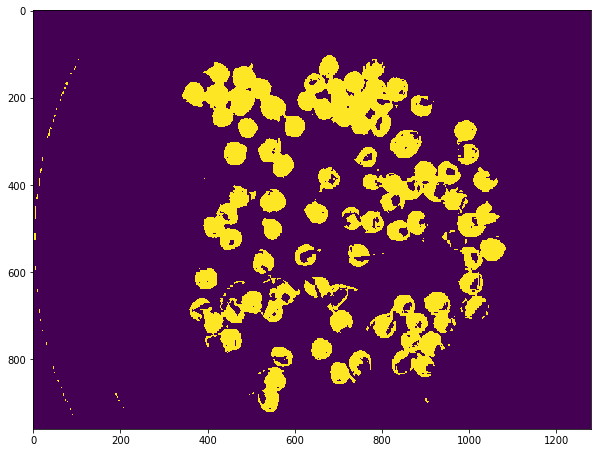

In [42]:
ret, binary = cv2.threshold(yuv[:,:,1], int(b[h.argmax() - 3]), 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary)
plt.show()

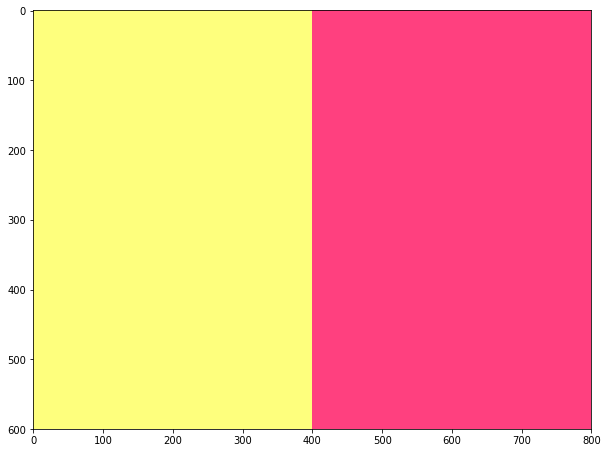

In [43]:
a = np.zeros((600,400,3), dtype=np.uint8)
a[:,:,0] += 255
a[:,:,1] += 64
a[:,:,2] += 127



plt.imshow(np.hstack((cv2.cvtColor(a, cv2.COLOR_YUV2RGB), a)))
plt.show()

-1

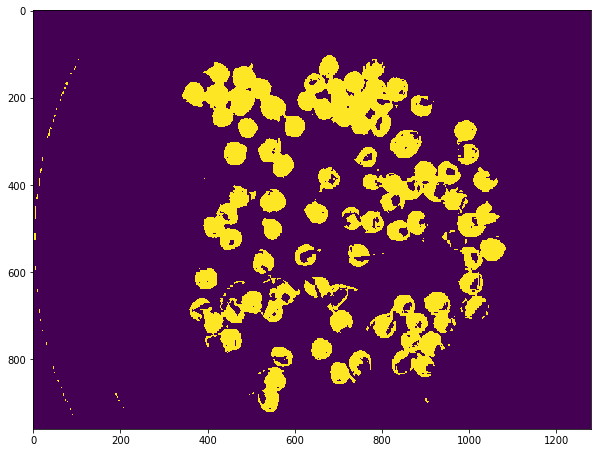

In [44]:
medianFiltered = cv2.medianBlur(binary, 1)
plt.imshow(medianFiltered)
cv2.waitKey(0)

In [45]:
_, contours, hierarchy = cv2.findContours(medianFiltered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10 :
        contour_list.append(contour)

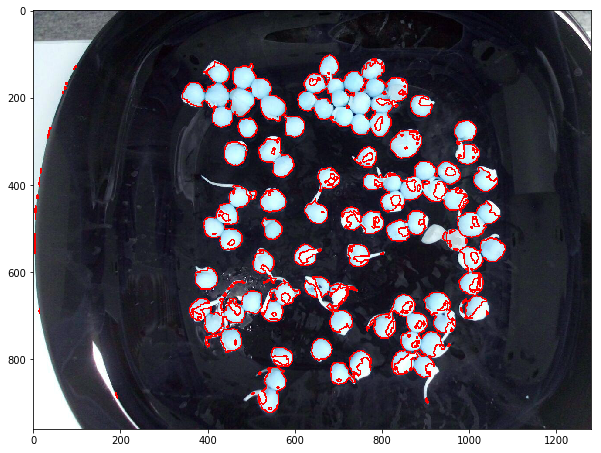

In [46]:
cv2.drawContours(im, contour_list,  -1, (255,0,0), 2)
plt.imshow(im)
cv2.waitKey(0)

mplim.imsave('result_img.jpg', im)

'C:\\Users\\mi\\Downloads\\Telegram Desktop\\result_img.jpg'

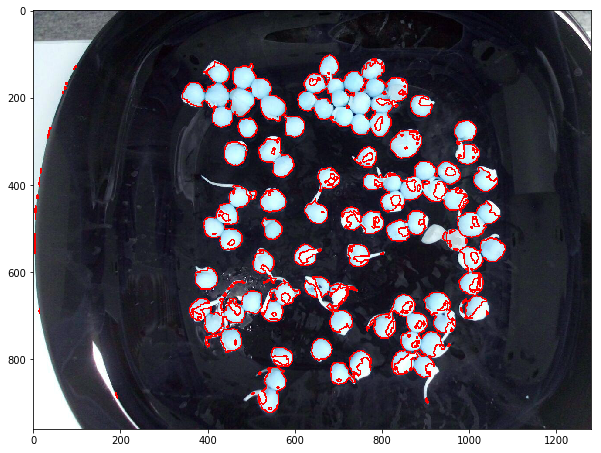

In [47]:
res = Image.open('result_img.jpg')
plt.imshow(res)

os.path.abspath('result_img.jpg')